<a href="https://colab.research.google.com/github/ElpoderdelComputo/Tutoriales_YouTube/blob/main/Busqueda_por_reticula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Busqueda por reticula**

# **El poder del Cómputo**
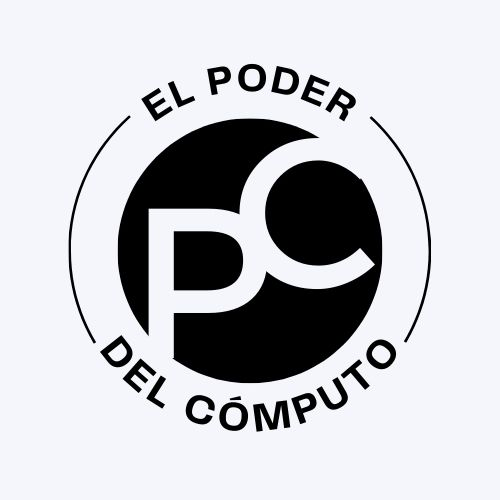

In [6]:
# -*- coding: utf-8 -*-

# Importar las librerias a utilizar
import pandas as pd
# Abre archivo >>> Train_RF_2021.csv desde google drive
df= pd.read_csv("/content/drive/MyDrive/DATOS_2002_2021/Train_2021.csv", header=0)

#Mostrar primeros 5 registros
df[:5]

,X,Y,R,G,B,ExG,ExR,ExGR,CIVE,VEG,NGRDI,NDI,CLASE
0,26,89,62,76,76,14,10.8,3.2,28.95345,1.145453,0.101449,140.985507,4
1,24,88,66,80,81,13,12.4,0.6,30.39845,1.132214,0.095890,140.273973,4
2,26,87,67,81,81,14,12.8,1.2,30.02845,1.134926,0.094595,140.108108,4
3,27,87,67,82,79,18,11.8,6.2,28.04745,1.158543,0.100671,140.885906,4
4,80,61,70,71,73,-1,27.0,-28.0,34.78145,1.000211,0.007092,128.907801,4


In [7]:
import numpy as np
# Valores de X: R,G,B,ExR,NGRDI
X = df.iloc[: , [2,3,4,5,10]].values
# y es la columna 12
y = df.iloc[: , 12].values

#imprime etiquetas de clases
print('Etiquetas de clase:', np.unique(y))
print(X[:5])

Etiquetas de clase: [1 2 3 4]
[[ 6.20000000e+01  7.60000000e+01  7.60000000e+01  1.40000000e+01
   1.01449275e-01]
 [ 6.60000000e+01  8.00000000e+01  8.10000000e+01  1.30000000e+01
   9.58904110e-02]
 [ 6.70000000e+01  8.10000000e+01  8.10000000e+01  1.40000000e+01
   9.45945950e-02]
 [ 6.70000000e+01  8.20000000e+01  7.90000000e+01  1.80000000e+01
   1.00671141e-01]
 [ 7.00000000e+01  7.10000000e+01  7.30000000e+01 -1.00000000e+00
   7.09219900e-03]]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

## División de datos en 90% de entrenamiento y 10% de datos de prueba:
# random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.10,
                                                    stratify=y,
                                                    random_state=1)

In [10]:
# Mostrar cuantos datos hay en total: en entrenamiento y prueba
print('\nNumero de etiquetas en y:', np.bincount(y))
print('Numero de etiquetas en y_train:', np.bincount(y_train))
print('Numero de etiquetas en y_test:', np.bincount(y_test))

# Estandarizar los datos
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


Numero de etiquetas en y: [   0 2672 2246 3507 1718]
Numero de etiquetas en y_train: [   0 2405 2021 3156 1546]
Numero de etiquetas en y_test: [  0 267 225 351 172]


In [17]:
# una prueba rapida 
clf = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=50,
                       n_jobs=-1, random_state=1)

## Se entrena el modelo
clf.fit(X_train_std, y_train)
# score de entrenamiento 
pg2 = clf.score(X_train_std, y_train)

print('\nTrain Accuracy clf: %.5f' % pg2)

#Evaluando la prediccion con Xtest
y_pred = clf.predict(X_test_std)

print('Test Accuracy clf: %.5f' % clf.score(X_test_std, y_test))


Train Accuracy clf: 0.91630
Test Accuracy clf: 0.90345


In [12]:
from sklearn.model_selection import GridSearchCV
# Búsqueda exhaustiva de hiperparámetros especificados para un estimador

# Número de árboles en el random forest (ne)
n_estimators = [50,100,120,150,200]

# El número de características a considerar al buscar la mejor división: (mc)
max_features = ['log2','sqrt','auto']

#criterio de impureza (cr)
criterion = ['gini','entropy'] 

# Número máximo de niveles en el árbol (mp)
max_depth = [8,10,11,12,13,14,15]

# Crear retícula
param_grid = [{'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth}]


# Crear el modelo base para ajustar
rf = RandomForestClassifier()

#busqueda exhaustiva
gs = GridSearchCV(estimator = rf, 
                  param_grid = param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  n_jobs=-1)

# Sea justan los modelos
gs = gs.fit(X_train_std, y_train)

# Mejor score
print(gs.best_score_)
# Mejores parametros
print(gs.best_params_)

# El mejor estimador 
clf = gs.best_estimator_

0.9249565934972768
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}


In [13]:
# Evaluamos el mejor estumador con X_test_std y y_test
print('Test accuracy: %.5f' % clf.score(X_test_std, y_test))

Test accuracy: 0.92512


In [19]:
# Guardando el mejor modelo
import joblib
joblib.dump(clf, "./RF_BUENMODELO1.pkl")

['./RF_BUENMODELO1.pkl']

In [20]:
#importamos el mejor modelo ajustado 
clf_entrenado = joblib.load('/content/RF_BUENMODELO1.pkl')